# EDA PC Games Sales

    The primary focus of this project is to perform an exploratory data analysis (EDA) on a dataset related to PC game sales.  Through this EDA, the aim is to gain valuable insights and uncover patterns, trends, and relationships that may exist within the data.
    
    In this project, the data exploration journey and the techniques employed to understand the dataset's structure and content will be displayed. Visualizations will be shown to reveal meaningful information about game sales across relevant factors.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\projectData\Games.csv")

    By default, pandas limits the number of displayed rows to a smaller value. The code to display the maximum number of rows was set.

In [76]:
pd.set_option('display.max_rows', 175)
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts


# First Look at the Data

    In this part of the project the detailed information about the dataset is provided. Column names and column data types are displayed. I will also count the number of null and unique values to identify if there is any missing data that could possibly affect the conclusions.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       175 non-null    object 
 1   Sales      175 non-null    float64
 2   Series     139 non-null    object 
 3   Release    175 non-null    object 
 4   Genre      175 non-null    object 
 5   Developer  175 non-null    object 
 6   Publisher  175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


In [5]:
df.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


    The only null values are found in the 'Series' column. This is reasonable as some games are standalone releases and do not belong to any series. So I decided to keep all the data, since removing it could potentially impact the accuracy of the calculation results.

In [6]:
df.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [7]:
df.nunique()

Name         175
Sales         30
Series        91
Release      130
Genre         61
Developer    109
Publisher     96
dtype: int64

# Formatting the Data

    Splitting the column 'Release' into two separate columns 'Month' and 'Year'

In [77]:
df[['Month','Year']]= df['Release'].str.split(pat='-', n=1, expand=True)
df

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,17
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,11
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,12
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,06
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,11
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,Nov,04
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),Nov,04
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt,May,15
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment,Mar,98
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts,Feb,00


    Changing the data type of 'Year' column to integer to run a function that will change the two-digit year formatting into four-digit year formatting

In [78]:
df.dtypes

Name          object
Sales        float64
Series        object
Release       object
Genre         object
Developer     object
Publisher     object
Month         object
Year          object
dtype: object

In [79]:
df['Year'] = df['Year'].astype(int)
print(df.dtypes)

Name          object
Sales        float64
Series        object
Release       object
Genre         object
Developer     object
Publisher     object
Month         object
Year           int32
dtype: object


    Creating a function to change 'Year' column formatting

In [80]:
# Function to convert the two-digit year to four-digit year
def convert_to_four_digit_year(year):
    if year < 100:
        if year < 50:
            return 2000 + year
        else:
            return 1900 + year
    else:
        return year

# Apply the function to the 'Year' column using a lambda function
df['Year'] = df['Year'].apply(lambda x: convert_to_four_digit_year(x))

In [81]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,2017
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,2012
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,2006
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,2011
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,Nov,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),Nov,2004
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt,May,2015
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment,Mar,1998
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts,Feb,2000


# Data Visualisation

    Looking at top 10 values by Sales

In [82]:
#Looking at top 10 values by Sales

df.sort_values(by = "Sales", ascending = False).head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton,Dec,2017
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,May,2012
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve,Nov,2006
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,2011
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,Nov,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),Nov,2004
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt,May,2015
8,StarCraft,11.0,StarCraft,Mar-98,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment,Mar,1998
9,The Sims,11.0,The Sims,Feb-00,Life simulation,Maxis,Electronic Arts,Feb,2000


    Looking at bottom 10 values by Sales

In [115]:
df.sort_values(by = "Sales", ascending = True).head(10)

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
174,Zoo Tycoon,1.0,Zoo Tycoon,Oct-01,Business simulation,Microsoft,Blue Fang Games,Oct,2001
118,Duke Nukem 3D,1.0,Duke Nukem,Jan-96,First-person shooter,3D Realms,GT Interactive Software,Jan,1996
119,Dungeon Lords,1.0,NaN,May-05,Role-playing game,Heuristic Park,DreamCatcher Interactive,May,2005
120,Dungeon Siege,1.0,Dungeon Siege,Apr-02,Role-playing game,Gas Powered Games,Microsoft Game Studios,Apr,2002
121,Empire Earth,1.0,Empire Earth,Nov-01,Real-time strategy,Stainless Steel Studios,Sierra Entertainment,Nov,2001
122,Europa Universalis IV,1.0,Europa Universalis,Aug-13,Grand strategy,Paradox Development Studio,Paradox Interactive,Aug,2013
123,Frogger,1.0,Frogger,Nov-97,Action,SCE Cambridge Studio,Hasbro Interactive,Nov,1997
124,Full Throttle,1.0,NaN,Apr-95,Graphic adventure,LucasArts,LucasArts,Apr,1995
125,Glory of the Roman Empire,1.0,NaN,Jun-06,City-building game,Haemimont Games,CDV Software,Jun,2006
126,Grand Prix 2,1.0,Grand Prix,Aug-96,Sim racing,MicroProse,MicroProse,Aug,1996


# What is the Best-selling Genre of PC Games?

    Top 5 best-selling PC Games Genres are provided below. The genre that sold the most games is Real-time strategy. 

In [84]:
df['Genre'].value_counts().head()

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Top Best-Selling Genres of Games')

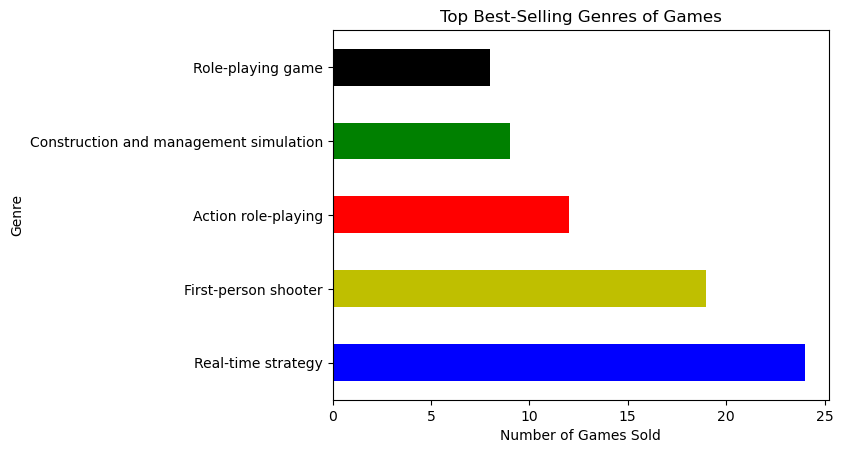

In [85]:
df['Genre'].value_counts().head().plot.barh(stacked = True, color = list('byrgk'))
plt.xlabel('Number of Games Sold')
plt.ylabel('Genre')
plt.title('Top Best-Selling Genres of Games')

# Sales of Games by Year

    The correlation between the Year of Release and Sales was not found. As seen on the graph the graph line doesnt follow a pattern nor trend. Fresh releases dont sale better than the old ones, no connection is found.

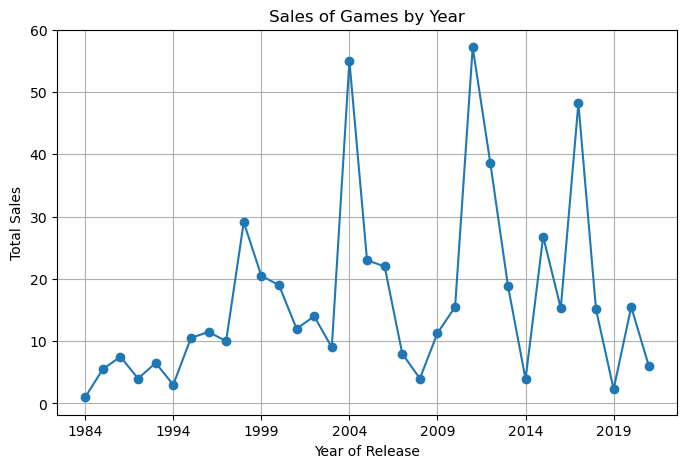

In [111]:

df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string for plotting

# Group the data by 'Year' and sum the 'Sales' for each year
sales_per_year = df.groupby('Year')['Sales'].sum()

# Plot the sales per year as a line plot
sales_per_year.plot(kind='line', marker='o', figsize=(8, 5))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Sales of Games by Year')
plt.grid(True)
plt.show()

    The line graph reaches a couple of peak point in 2004 and 2010~, so I will investigate the factors contributing to or influencing these peaks.
    
    The top sales were reached by the games released in 2011 (57.2 million) and 2004 (55.0 million)

In [109]:
sales_per_year = df.groupby('Year')['Sales'].sum()

top_years = sales_per_year.nlargest(5)

print(top_years)

Year
2011    57.2
2004    55.0
2017    48.2
2012    38.6
1998    29.1
Name: Sales, dtype: float64


In [96]:
df['Year'].value_counts().head()

2004    11
2001    10
1999     9
2005     9
2016     9
Name: Year, dtype: int64

    It can be seen that 2004 was the year when the most games were released, therefore the bigger amount of sales is reasonable

In [100]:
data_2004 = df[df['Year'] == '2004']
data_2004

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,Nov,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),Nov,2004
11,RollerCoaster Tycoon 3,10.0,RollerCoaster Tycoon,Oct-04,Construction and management simulation,Frontier Developments,"Atari, Inc. (Windows)",Oct,2004
19,The Sims 2,6.0,The Sims,Sep-04,Life simulation,Maxis,Electronic Arts,Sep,2004
33,"Warhammer 40,000: Dawn of War (including expan...",4.0,Warhammer,Sep-04,Real-time strategy,Relic Entertainment,THQ,Sep,2004
64,Counter-Strike: Condition Zero,2.0,Counter-Strike,Mar-04,First-person shooter,Valve,Valve (digital),Mar,2004
65,Counter-Strike: Source,2.0,Counter-Strike,Nov-04,First-person shooter,Valve,Electronic Arts (retail),Nov,2004
69,Far Cry,2.0,Far Cry,Mar-04,First-person shooter,Crytek,Ubisoft,Mar,2004
101,Battlefield Vietnam,1.0,Battlefield,Mar-04,First-person shooter,EA DICE,Electronic Arts,Mar,2004
152,Rome: Total War,1.0,Total War,Sep-04,Real-time strategy,The Creative Assembly,Activision,Sep,2004


    In 2011 two major titles were realesed (Minecraft, Terraria), which are top-sellers and are having total sales of 50.2 million. I can conclude that those two games contributed to total sales for 2011.

In [110]:
data_2011 = df[df['Year'] == '2011']
data_2011

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic,May,2011
72,Magicka,2.0,NaN,Jan-11,Action-adventure,Arrowhead Game Studios,Paradox Interactive,Jan,2011
82,The Binding of Isaac,2.0,NaN,Sep-11,"Action-adventure, roguelike",Edmund McMillen & Florian Himsl,Headup Games,Sep,2011
84,The Witcher 2: Assassins of Kings,2.0,The Witcher,May-11,Action role-playing,CD Projekt Red,CD Projekt,May,2011
164,The Legend of Sword and Fairy 5,1.0,The Legend of Sword and Fairy,Jul-11,Role-playing game,Softstar,Softstar,Jul,2011


# Visualising Game Series

    From data exploration it was revealed that the Series "Minecraft" only contains one game with the Name "Minecraft". Since it may not provide meaningful insights as a series for my analysis I have decided to exclude it from my visualizations to focus on the more diverse series that have multiple games.

In [87]:
minecraft_data = df[df['Series'] == 'Minecraft']
minecraft_data

,Name,Sales,Series,Release,Genre,Developer,Publisher,Month,Year
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,Nov,2011


In [88]:
# Filter out the Series "Minecraft" from the DataFrame
filtered_df = df[df['Series'] != 'Minecraft']

#Best-selling Series of Games Top 10

sales_per_series = filtered_df.groupby('Series')['Sales'].sum(numeric_only=True)

# Sort the results in descending order of 'Sales' and take the top 10 rows
top_series = sales_per_series.sort_values(ascending=False).head(10)

print(top_series)

Series
Diablo                  26.0
The Sims                24.0
Half-Life               21.0
Warcraft                19.0
StarCraft               19.0
The Witcher             16.0
Civilization            14.0
RollerCoaster Tycoon    14.0
Guild Wars              11.0
Dark Souls               9.6
Name: Sales, dtype: float64


# The Best-Selling Series of Games

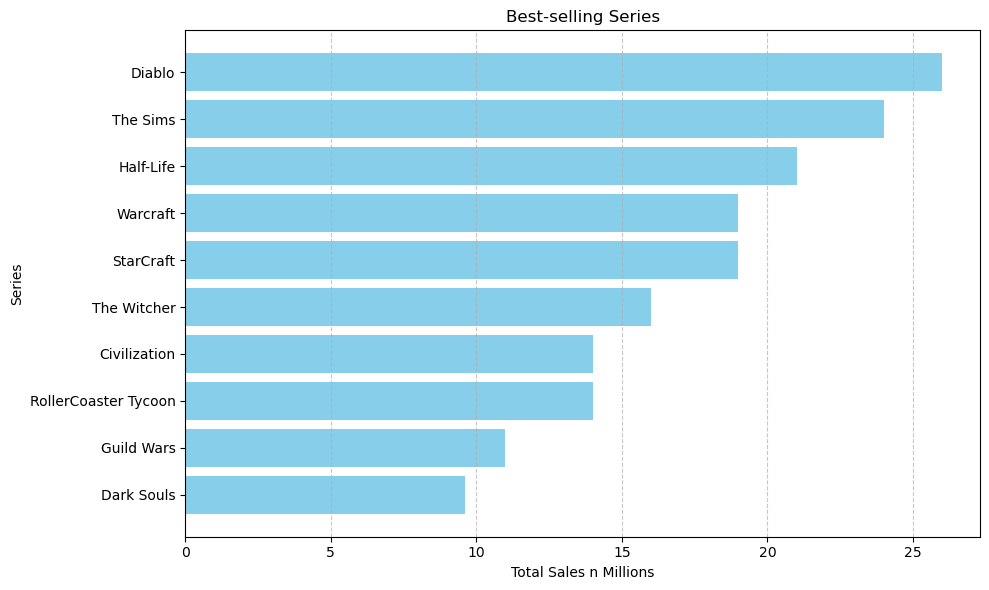

In [89]:
plt.figure(figsize=(10, 6))
plt.barh(top_series.index, top_series.values, color='skyblue')
plt.xlabel('Total Sales n Millions')
plt.ylabel('Series')
plt.title('Best-selling Series')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest sales at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

# Which Game from each Series Made the Most Sales?

In [90]:
#Looking at Sales of each game in the Series

# Group the data by 'Series' and 'Name', and sum the 'Sales' for each combination
sales_per_series_name = filtered_df.groupby(['Series', 'Name'])['Sales'].sum(numeric_only=True)

# Get the top 10 series based on total sales
top_series = filtered_df.groupby('Series')['Sales'].sum().nlargest(10).index

# Filter the data to include only the top 10 series
filtered_data = filtered_df[filtered_df['Series'].isin(top_series)]

# Pivot the data to create a DataFrame where each series is a column and each game name is a row
pivot_data = filtered_data.pivot(index='Name', columns='Series', values='Sales')

<Figure size 1600x1000 with 0 Axes>

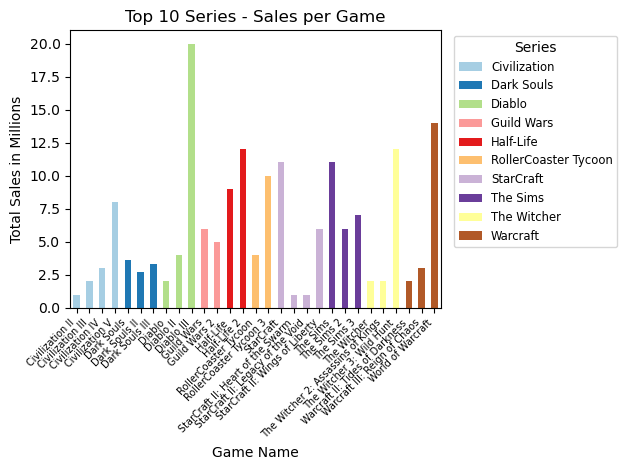

In [91]:
# Create a grouped bar plot
plt.figure(figsize=(16, 10))
pivot_data.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('Game Name')
plt.ylabel('Total Sales in Millions')
plt.title('Top 10 Series - Sales per Game')
plt.legend(title='Series', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small', ncol=1)
plt.xticks(rotation=45, ha='right',fontsize=7)
plt.tight_layout()
plt.show()

# Developer with Most Released Games

In [92]:
#The top developers
df['Developer'].value_counts().head()

Blizzard Entertainment        8
Maxis                         6
Paradox Development Studio    5
id Software                   4
Westwood Studios              4
Name: Developer, dtype: int64

Text(0.5, 1.0, 'Top Developers')

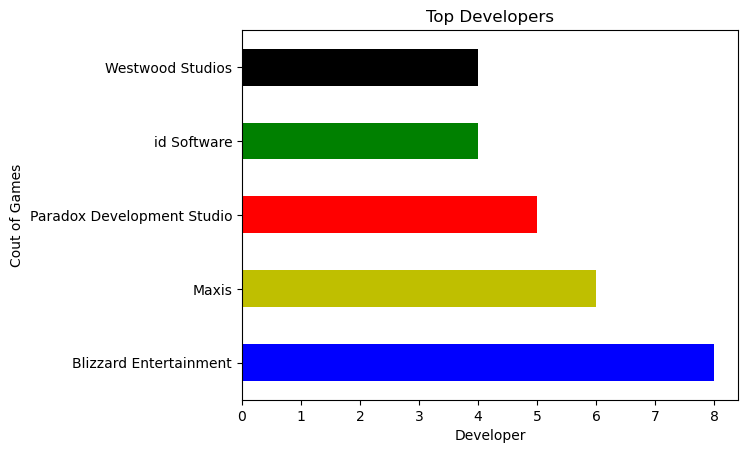

In [93]:
df['Developer'].value_counts().head().plot.barh(color = list('byrgk'))
plt.xlabel('Developer')
plt.ylabel('Cout of Games')
plt.title('Top Developers')

# Publisher with Most Released Games

In [94]:
#The top publishers with the most released game titles
df['Publisher'].value_counts().head()

Electronic Arts           19
Blizzard Entertainment     8
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: Publisher, dtype: int64

Text(0.5, 1.0, 'Top Publishers')

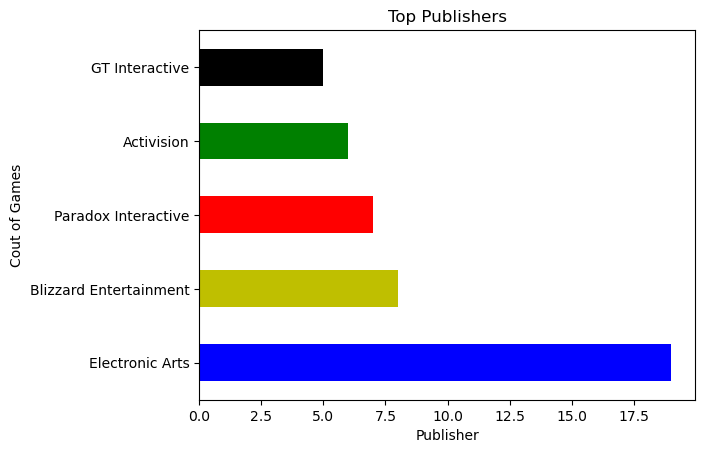

In [95]:
df['Publisher'].value_counts().head().plot.barh(color = list('byrgk'))
plt.xlabel('Publisher')
plt.ylabel('Cout of Games')
plt.title('Top Publishers')